In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))


In [2]:
number_cell_mAP_file_path <- file.path("../results/mAP_cell_number_subsampled.parquet")
figures_path <- file.path("../figures")
if (!dir.exists(figures_path)) {
  dir.create(figures_path)
}
number_cell_mAP <- arrow::read_parquet(number_cell_mAP_file_path)
dim(number_cell_mAP)
head(number_cell_mAP)

[1] 19890    14

Metadata_Time,Metadata_dose,Metadata_reference_index,mean_average_precision,indices,p_value,corrected_p_value,below_p,below_corrected_p,-log10(p-value),number_of_cells,seed,shuffle,__index_level_0__
<dbl>,<dbl>,<int>,<dbl>,<list<integer>>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<int>,<int>,<lgl>,<int>
0,0.61,-1,0.3666667,"0, 9, 18",0.7994312,0.8993601,FALSE,FALSE,0.04606638,75,0,TRUE,0
0,1.22,-1,0.4388889,"1, 10, 19",0.6996333,0.8993601,FALSE,FALSE,0.04606638,75,0,TRUE,1
0,2.44,-1,0.3250000,"2, 11, 20",0.8997821,0.8997821,FALSE,FALSE,0.04586265,75,0,TRUE,2
0,4.88,-1,0.4916667,"3, 12, 21",0.5991764,0.8987646,FALSE,FALSE,0.04635404,75,0,TRUE,3
0,9.77,-1,0.5250000,"4, 13, 22",0.4993425,0.8987646,FALSE,FALSE,0.04635404,75,0,TRUE,4
0,19.53,-1,0.4638889,"5, 14, 23",0.5991764,0.8987646,FALSE,FALSE,0.04635404,75,0,TRUE,5


In [3]:
# number_cell_mAP <- number_cell_mAP %>% filter(Metadata_dose == 0.61)
number_cell_mAP <- number_cell_mAP %>% group_by(shuffle, number_of_cells,Metadata_Time, Metadata_dose) %>%
  summarise(mAP = mean(mean_average_precision))
number_cell_mAP$Metadata_Time <- number_cell_mAP$Metadata_Time * 30
number_cell_mAP$number_of_cells <- as.numeric(number_cell_mAP$number_of_cells)
head(number_cell_mAP)

`summarise()` has grouped output by 'shuffle', 'number_of_cells',
'Metadata_Time'. You can override using the `.groups` argument.


shuffle,number_of_cells,Metadata_Time,Metadata_dose,mAP
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,1,0,0.61,0.4388889
FALSE,1,0,1.22,0.5555556
FALSE,1,0,2.44,0.6111111
FALSE,1,0,4.88,0.8055556
FALSE,1,0,9.77,0.5833333
FALSE,1,0,19.53,0.6944444


In [4]:
# change the shuffle values
number_cell_mAP$shuffle <- gsub("FALSE", "No shuffle", number_cell_mAP$shuffle)
number_cell_mAP$shuffle <- gsub("TRUE", "Shuffle", number_cell_mAP$shuffle)

In [5]:
color_palette_for_dose <- c(
    "0" = "#57F2F2",
    "0.61" = "#63D6D6",
    "1.22" = "#65BABA",
    "2.44" = "#68A3A3",
    "4.88" = "#668A8A",
    "9.76" = "#5E7070",
    "19.53" = "#4B5757",
    "39.06" = "#2F3D3D",
    "78.13" = "#182424",
    "156.25" = "#030A0A"
)

number_cell_mAP$Metadata_dose <- as.character(number_cell_mAP$Metadata_dose)
number_cell_mAP$Metadata_dose <- factor(number_cell_mAP$Metadata_dose,
                                             levels = c("0.61", "1.22", "2.44", "4.88",
                                                        "9.77", "19.53", "39.06", "78.13", "156.25"))

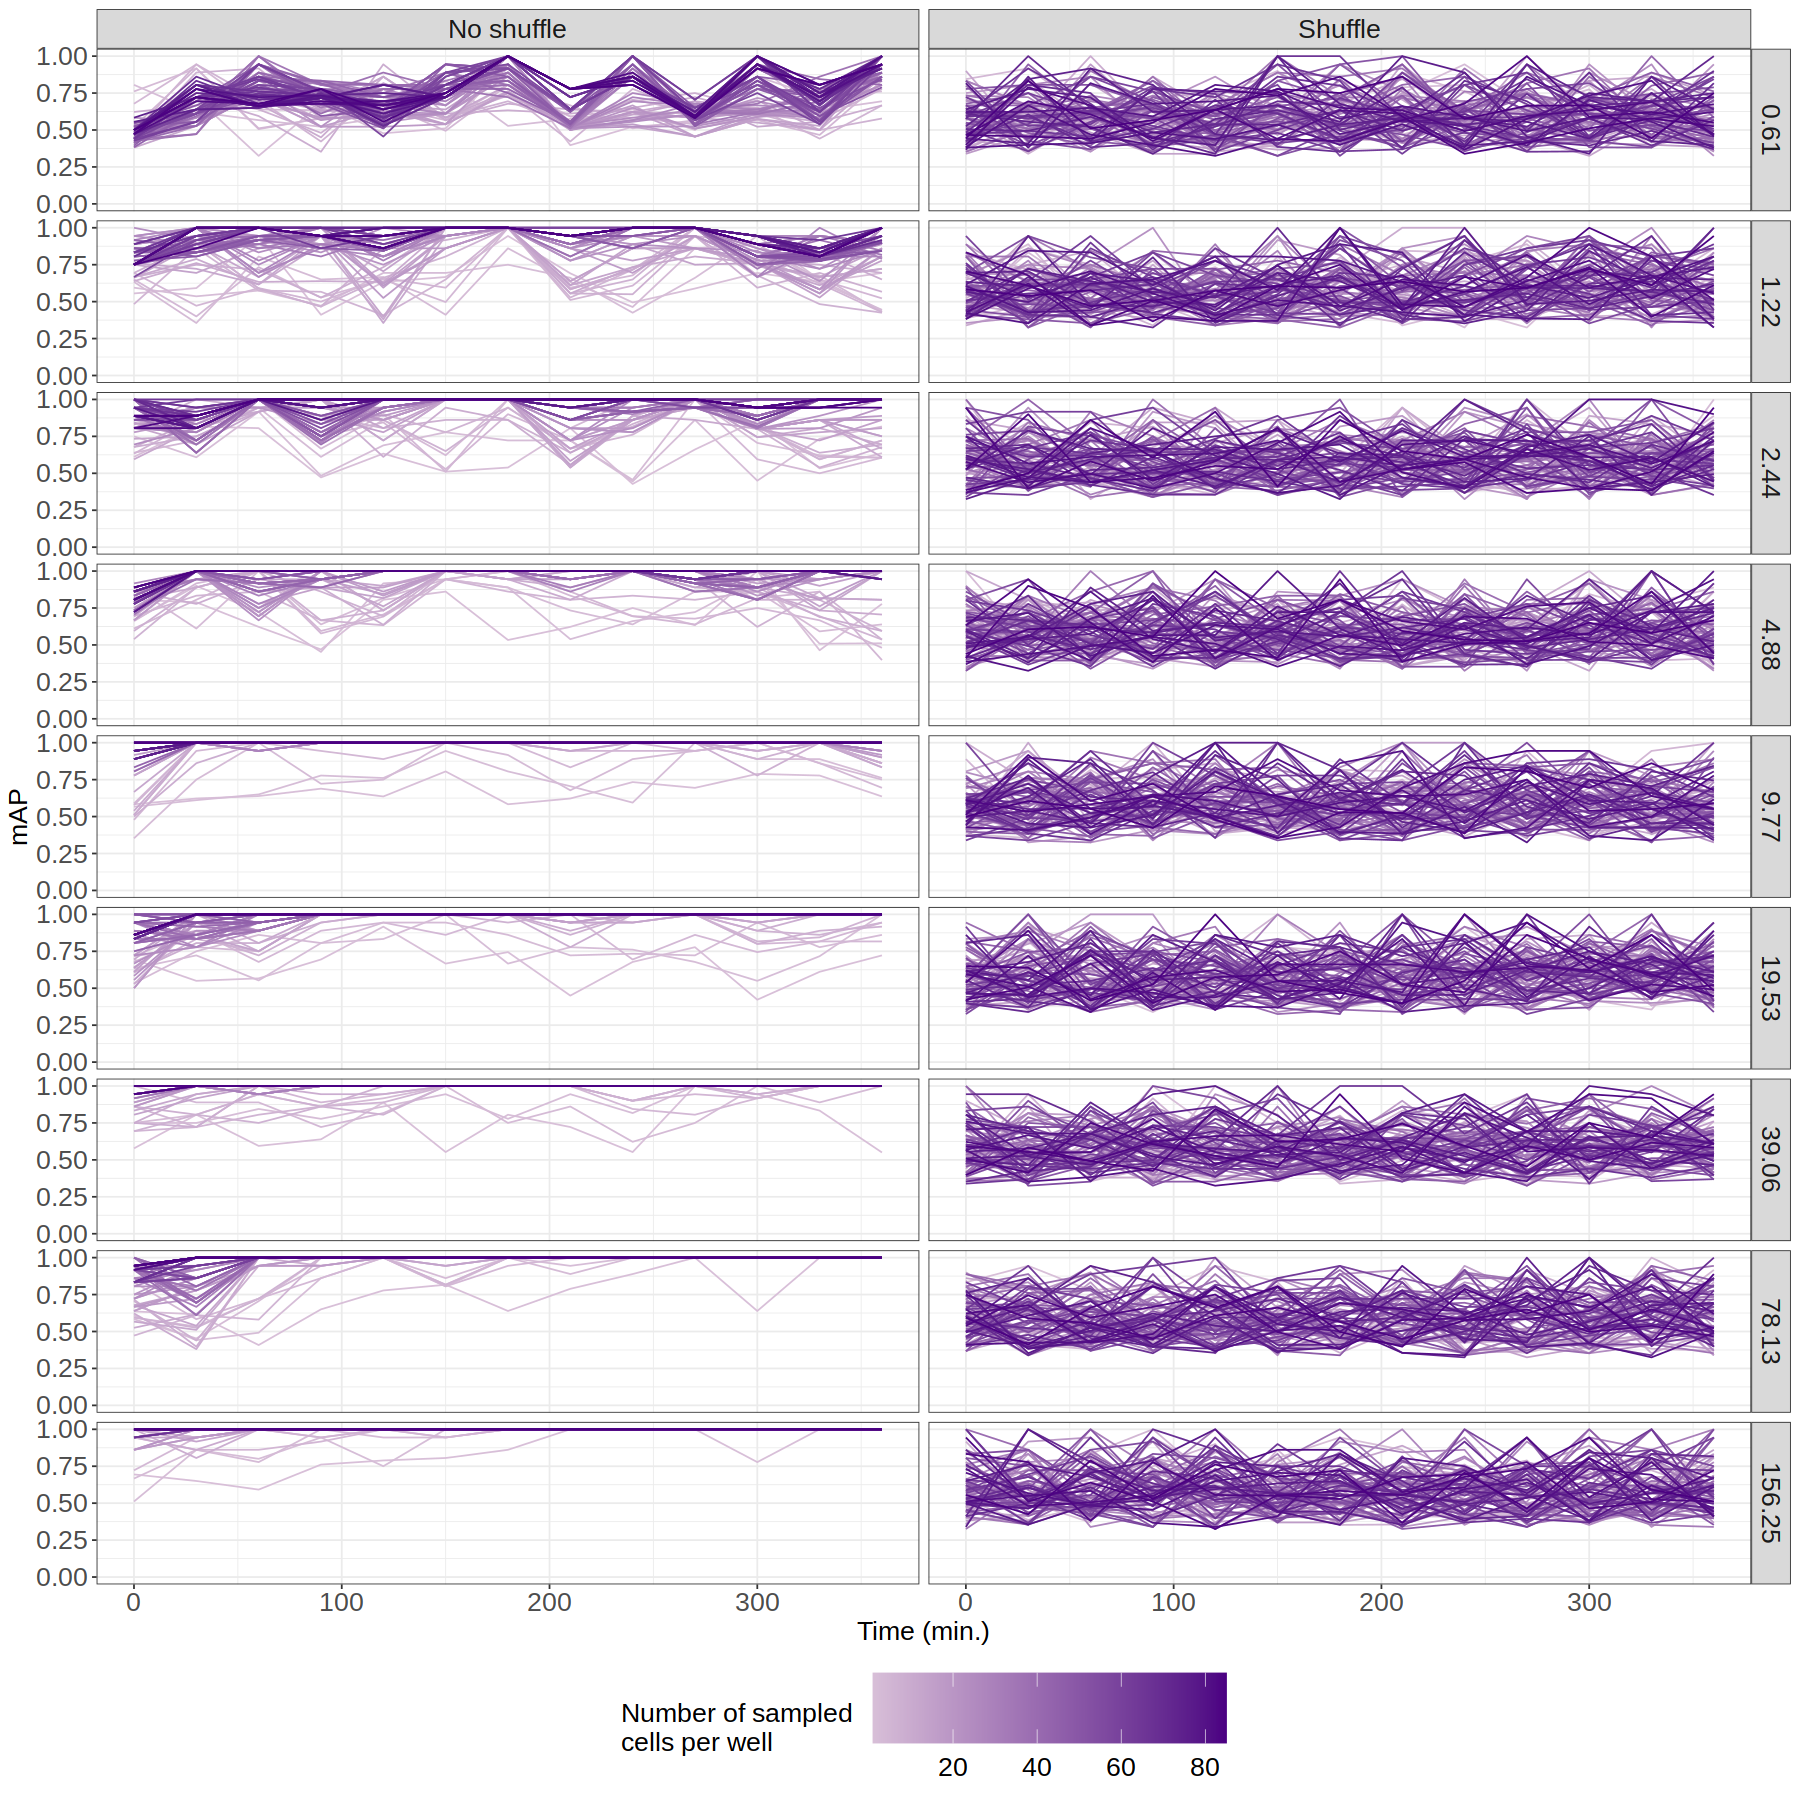

In [6]:
width <- 15
height <- 15
options(repr.plot.width = width, repr.plot.height = height)
percent_cell_line_plot <- (
    ggplot(data = number_cell_mAP, aes(x = Metadata_Time, y = mAP))
    + geom_line(aes(
        group = number_of_cells, 
        color = number_of_cells))
    + labs(x="Time (min.)", y = "mAP", fill = "Number of \nsampled cells", color = "Dose (nM)")
    + facet_grid(Metadata_dose ~ shuffle)
    # make the color a gradient continuous scale 
    + scale_color_continuous(
        low = "#D8BFD8",  # Light purple (Thistle)
        high = "#4B0082",  # Dark purple (Indigo)
        name = "Number of sampled \ncells per well"
    )
    
    # + scale_color_manual(values = color_palette_for_dose)
    + ylim(0, 1)
    + theme_bw()
    + theme(
        strip.text.x = element_text(size = 16),
        strip.text.y = element_text(size = 16),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        legend.text = element_text(size = 16),

        legend.title = element_text(size = 16),
        legend.position = "bottom",
        legend.box = "horizontal",
        legend.box.just = "left",
        legend.key.size = unit(1.5, "cm"),
        legend.key.width = unit(1.5, "cm"),
    )
    + guides(
        fill = guide_legend(nrow = 1, byrow = TRUE),
    )

)
ggsave(
    filename = file.path(figures_path, "number_cell_mAP.png"),
    plot = percent_cell_line_plot,
    width = width,
    height = height,
    dpi = 600
)
percent_cell_line_plot